In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
Data = pd.read_csv(r"C:\Users\ENEJI\Desktop\DATA SCIENCE\PROJECTS\TESLA STOCK PRICE PREDICTION\TESLA stocks\TSLA.csv")

In [8]:
Data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


Check the datatypes of the columns

In [9]:
Data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

convert "Date" column to datetime datatype

In [10]:
Data["Date"] = pd.to_datetime(Data["Date"])

In [11]:
Data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Creating a column known as year to visualize how the closing stocks performed on average per year

In [12]:
Data["Year"] = Data["Date"].dt.year

In [13]:
Data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,2010


In [14]:
Data.shape

(2416, 8)

To summarize the Dataset

In [15]:
Data.describe()

,Open,High,Low,Close,Adj Close,Volume,Year
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03,2416.000000
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06,2014.776904
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06,2.787784
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05,2010.000000
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06,2012.000000
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06,2015.000000
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06,2017.000000
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07,2020.000000


checking for null values

In [16]:
Data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
dtype: int64

another way of doing that

In [17]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
 7   Year       2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 151.1 KB


# EXPLORATORY DATA ANALYSIS

To visualize how the stock Close price of Tesla has been over the 11 year period

Text(0, 0.5, 'Price in Dollars')

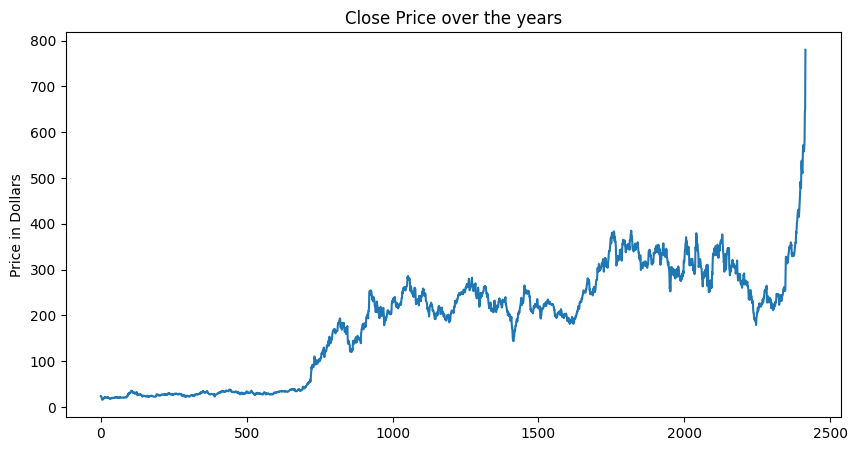

In [18]:
plt.figure(figsize = (10,5))
sns.lineplot(data = Data["Close"])
plt.title("Close Price over the years")
plt.ylabel("Price in Dollars")

To check the trend of the Close price on average per year

<Axes: xlabel='Year', ylabel='Close'>

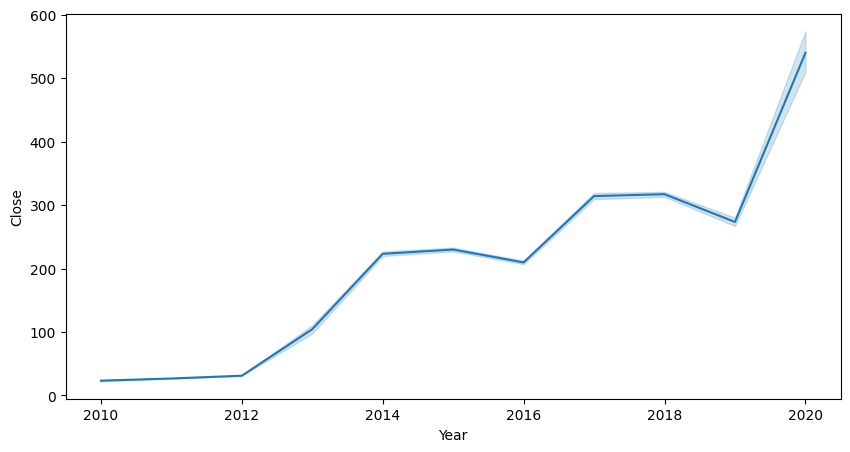

In [19]:
plt.figure(figsize = (10,5))
sns.lineplot(data = Data, x = "Year", y = "Close")

In [20]:
Data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,2010


Seems like the data in the Close and the Adj Close columns are the same but we need to check to be sure

In [21]:
Data[Data["Close"] == Data["Adj Close"]].shape

(2416, 8)

the entire dataset shape is 

In [22]:
Data.shape

(2416, 8)

This means that the columns Close and Adj Close are exactly the same and this implies that the data is redundant so we have to drop the Adj Close column

In [23]:
Data.drop("Adj Close", axis = 1, inplace = True)

In [24]:
Data.head()

,Date,Open,High,Low,Close,Volume,Year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,2010


Using a subplot to plot the several features in the Data to check the distribution of the various prices

C:\Users\ENEJI\AppData\Local\Temp\ipykernel_27868\1180876355.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


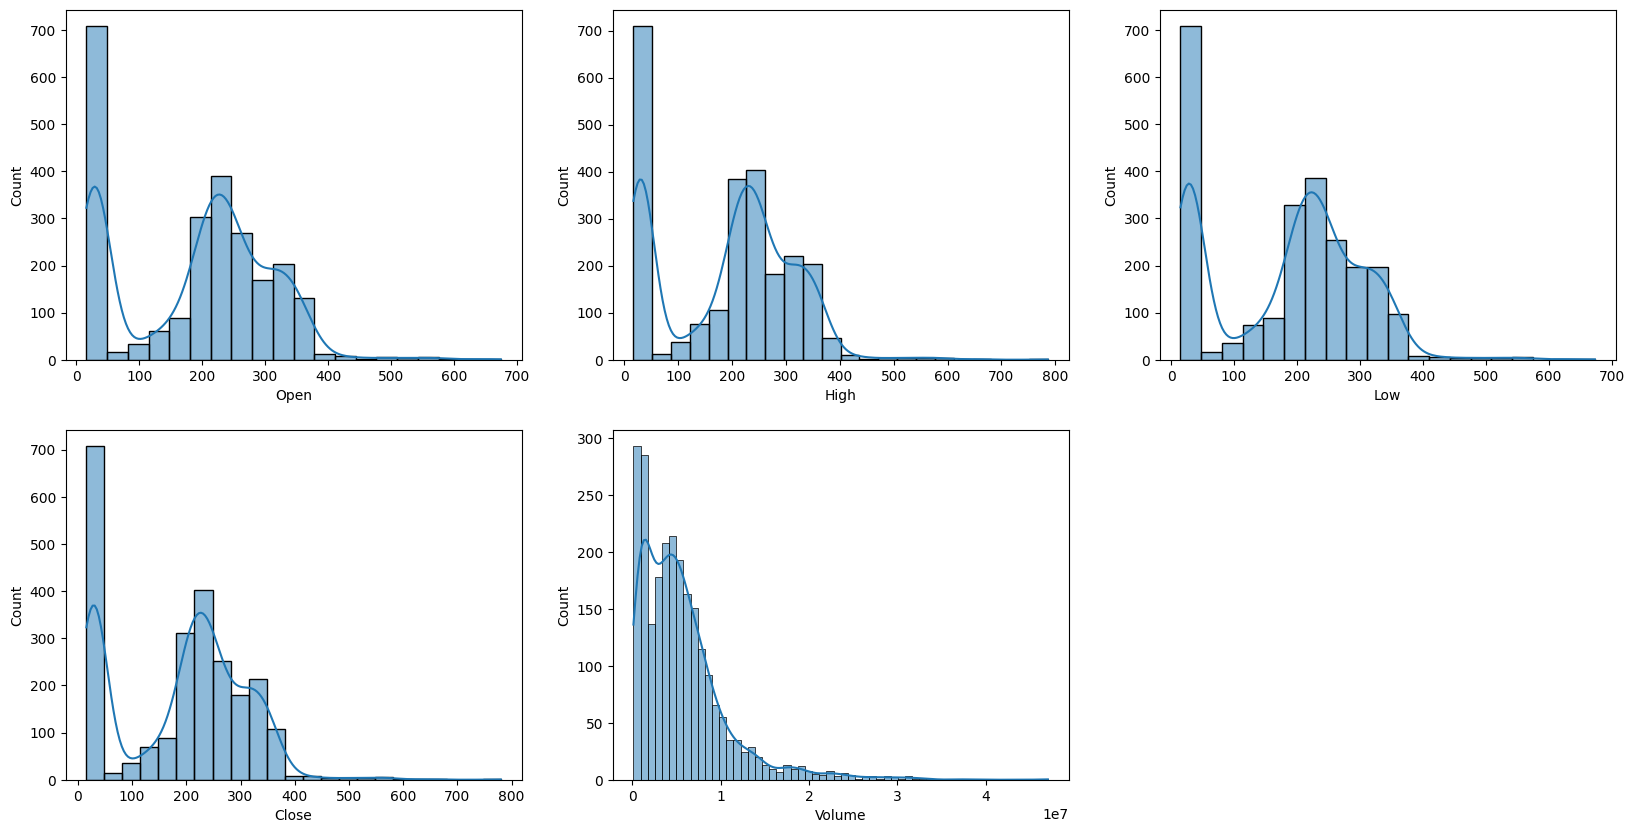

In [25]:
features = ["Open", "High", "Low", "Close", "Volume"]
plt.subplots(figsize = (20,10))

for i, col in enumerate (features):
    plt.subplot(2,3,i+1)
    sns.histplot(Data[col], kde = True)

We can see that the distributions for Open, High, Low, and Close look the same. However, the Volume distribution seems to be skewed to the left

To check for outliers in the Open, High, Low, Close, and Volume columns we make use of the boxplots

C:\Users\ENEJI\AppData\Local\Temp\ipykernel_27868\3783623638.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


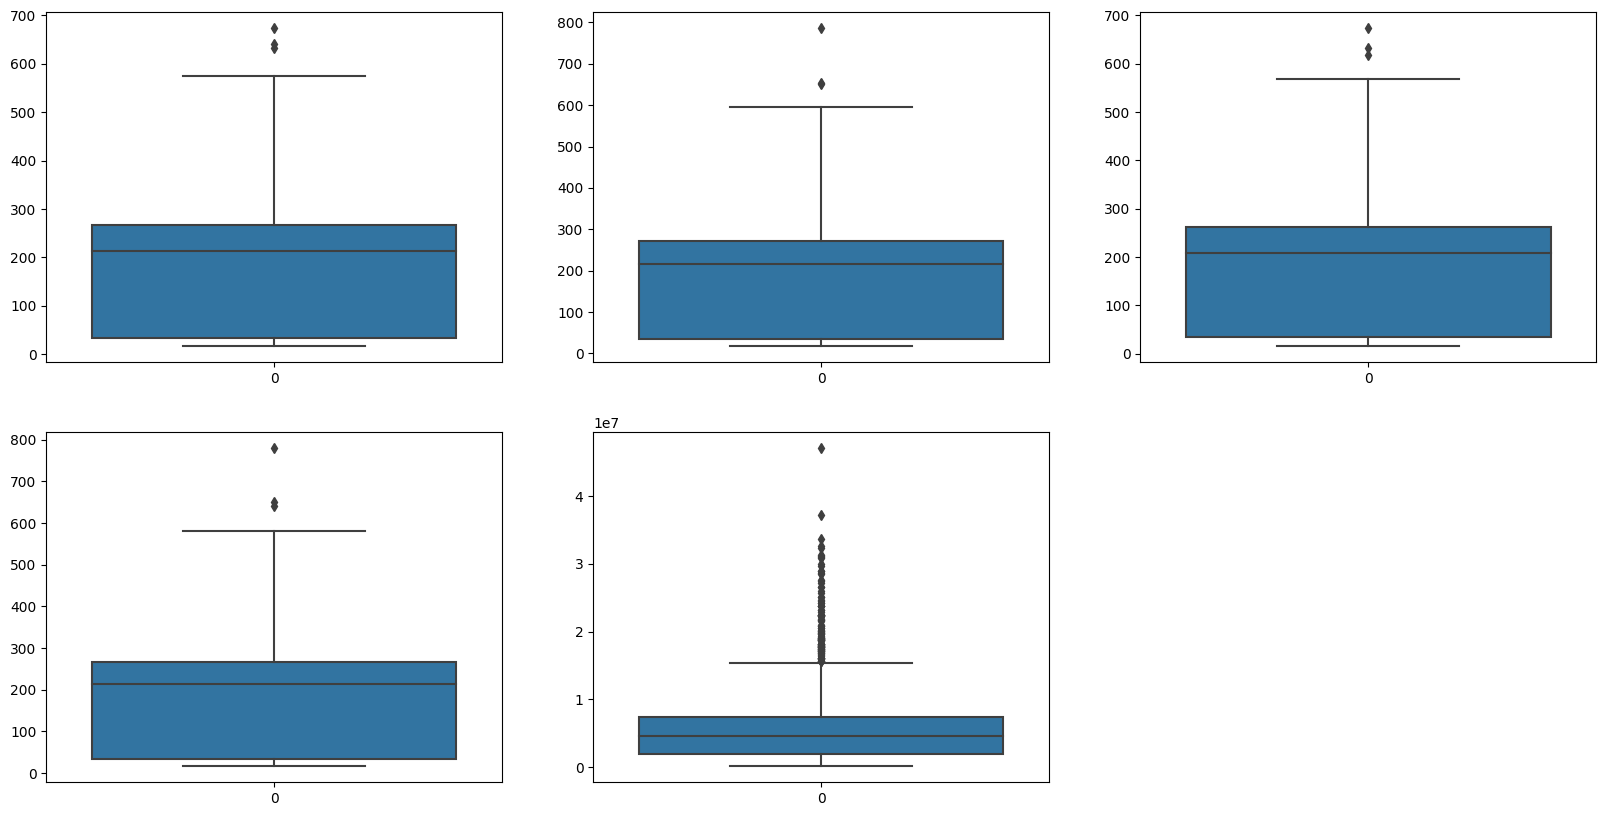

In [26]:
features = ["Open", "High", "Low", "Close", "Volume"]
plt.subplots(figsize = (20,10))

for i, col in enumerate (features):
    plt.subplot(2,3,i+1)
    sns.boxplot(Data[col])

It is clear that the Volume column has lots of outliers

# NEXT WE PERFORM FEATURE ENGINEERING

Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

To create new columns from the Date column 

In [27]:
Data["Day"] = Data["Date"].dt.day #To extract the day of the month

In [28]:
Data["Month"] = Data["Date"].dt.month #To extract the month

In [29]:
Data["Week_Of_year"] = Data["Date"].dt.weekofyear

C:\Users\ENEJI\AppData\Local\Temp\ipykernel_27868\359496761.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Data["Week_Of_year"] = Data["Date"].dt.weekofyear


In [30]:
Data["Day_Of_Week"] = Data["Date"].dt.day

In [31]:
Data["WeekDay"] = Data["Date"].dt.weekday #To extract the number of the days of the week

Using the loc function to map the weekdays to the respective name of the days

In [32]:
Data.loc[Data["WeekDay"] == 0, "Name_Of_Day"] = "Monday"
Data.loc[Data["WeekDay"] == 1, "Name_Of_Day"] = "Tuesday"
Data.loc[Data["WeekDay"] == 2, "Name_Of_Day"] = "Wednesday"
Data.loc[Data["WeekDay"] == 3, "Name_Of_Day"] = "Thursday"
Data.loc[Data["WeekDay"] == 4, "Name_Of_Day"] = "Friday"

In [33]:
Data

,Date,Open,High,Low,Close,Volume,Year,Day,Month,Week_Of_year,Day_Of_Week,WeekDay,Name_Of_Day
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,2010,29,6,26,29,1,Tuesday
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,2010,30,6,26,30,2,Wednesday
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,2010,1,7,26,1,3,Thursday
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,2010,2,7,26,2,4,Friday
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,2010,6,7,27,6,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,11788500,2020,28,1,5,28,1,Tuesday
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,17801500,2020,29,1,5,29,2,Wednesday
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,29005700,2020,30,1,5,30,3,Thursday
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,15719300,2020,31,1,5,31,4,Friday


In [34]:
#To drop the  Day_Of_Week, Week_Of_year, and WeekDay columns
Data.drop(columns = ["Day_Of_Week", "Week_Of_year", "WeekDay"], inplace = True)

In [35]:
Data.head()

,Date,Open,High,Low,Close,Volume,Year,Day,Month,Name_Of_Day
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,2010,29,6,Tuesday
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,2010,30,6,Wednesday
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,2010,1,7,Thursday
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2010,2,7,Friday
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,2010,6,7,Tuesday


In [36]:
Data.head()

,Date,Open,High,Low,Close,Volume,Year,Day,Month,Name_Of_Day
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,2010,29,6,Tuesday
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,2010,30,6,Wednesday
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,2010,1,7,Thursday
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2010,2,7,Friday
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,2010,6,7,Tuesday


In [40]:
#The stock market only opens on weekdays - let us check to see if there are null values in the Day_Name column
Data[Data["Name_Of_Day"].isnull()]

,Date,Open,High,Low,Close,Volume,Year,Day,Month,Name_Of_Day


Meaning that there are no null values in the Day_Name column

To check the average Close price per Year and Day for the 11 year time span

In [41]:
Data.groupby(["Year","Name_Of_Day"]).agg({"Close" : "mean"})

Close
Year Name_Of_Day            
2010 Friday        23.171154
     Monday        23.619167
     Thursday      22.987692
     Tuesday       23.281852
     Wednesday     23.660741
2011 Friday        26.938431
     Monday        26.775000
     Thursday      26.765882
     Tuesday       26.815769
     Wednesday     26.727115
2012 Friday        31.009412
     Monday        31.484043
     Thursday      31.132549
     Tuesday       31.138200
     Wednesday     31.102941
2013 Friday       105.718039
     Monday       106.825000
     Thursday     102.902000
     Tuesday      105.562884
     Wednesday    101.088627
2014 Friday       222.649402
     Monday       222.589165
     Thursday     222.633000
     Tuesday      224.544038
     Wednesday    224.120001
2015 Friday       229.122653
     Monday       230.413959
     Thursday     230.616472
     Tuesday      229.591347
     Wednesday    230.456540
2016 Friday       208.787450
     Monday       211.452608
     Thursday     209.222745
     Tuesday      210.018654
     Wednesday    209.520000
2017 Friday       314.171373
     Monday       315.966955
     Thursday     313.386666
     Tuesday      313.934904
     Wednesday    314.284039
2018 Friday       316.912549
     Monday       316.982084
     Thursday     317.504708
     Tuesday      317.230588
     Wednesday    317.912200
2019 Friday       272.820786
     Monday       275.636666
     Thursday     273.731801
     Tuesday      274.841154
     Wednesday    270.722743
2020 Friday       529.410004
     Monday       578.605004
     Thursday     527.620001
     Tuesday      530.270004
     Wednesday    540.297501

Using a lineplot to visualize this

In [42]:
Agg = Data.groupby(["Year","Name_Of_Day"]).agg({"Close" : "mean"}).reset_index() #to reset the index

C:\Users\ENEJI\AppData\Local\Temp\ipykernel_27868\792949296.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5, i+1)


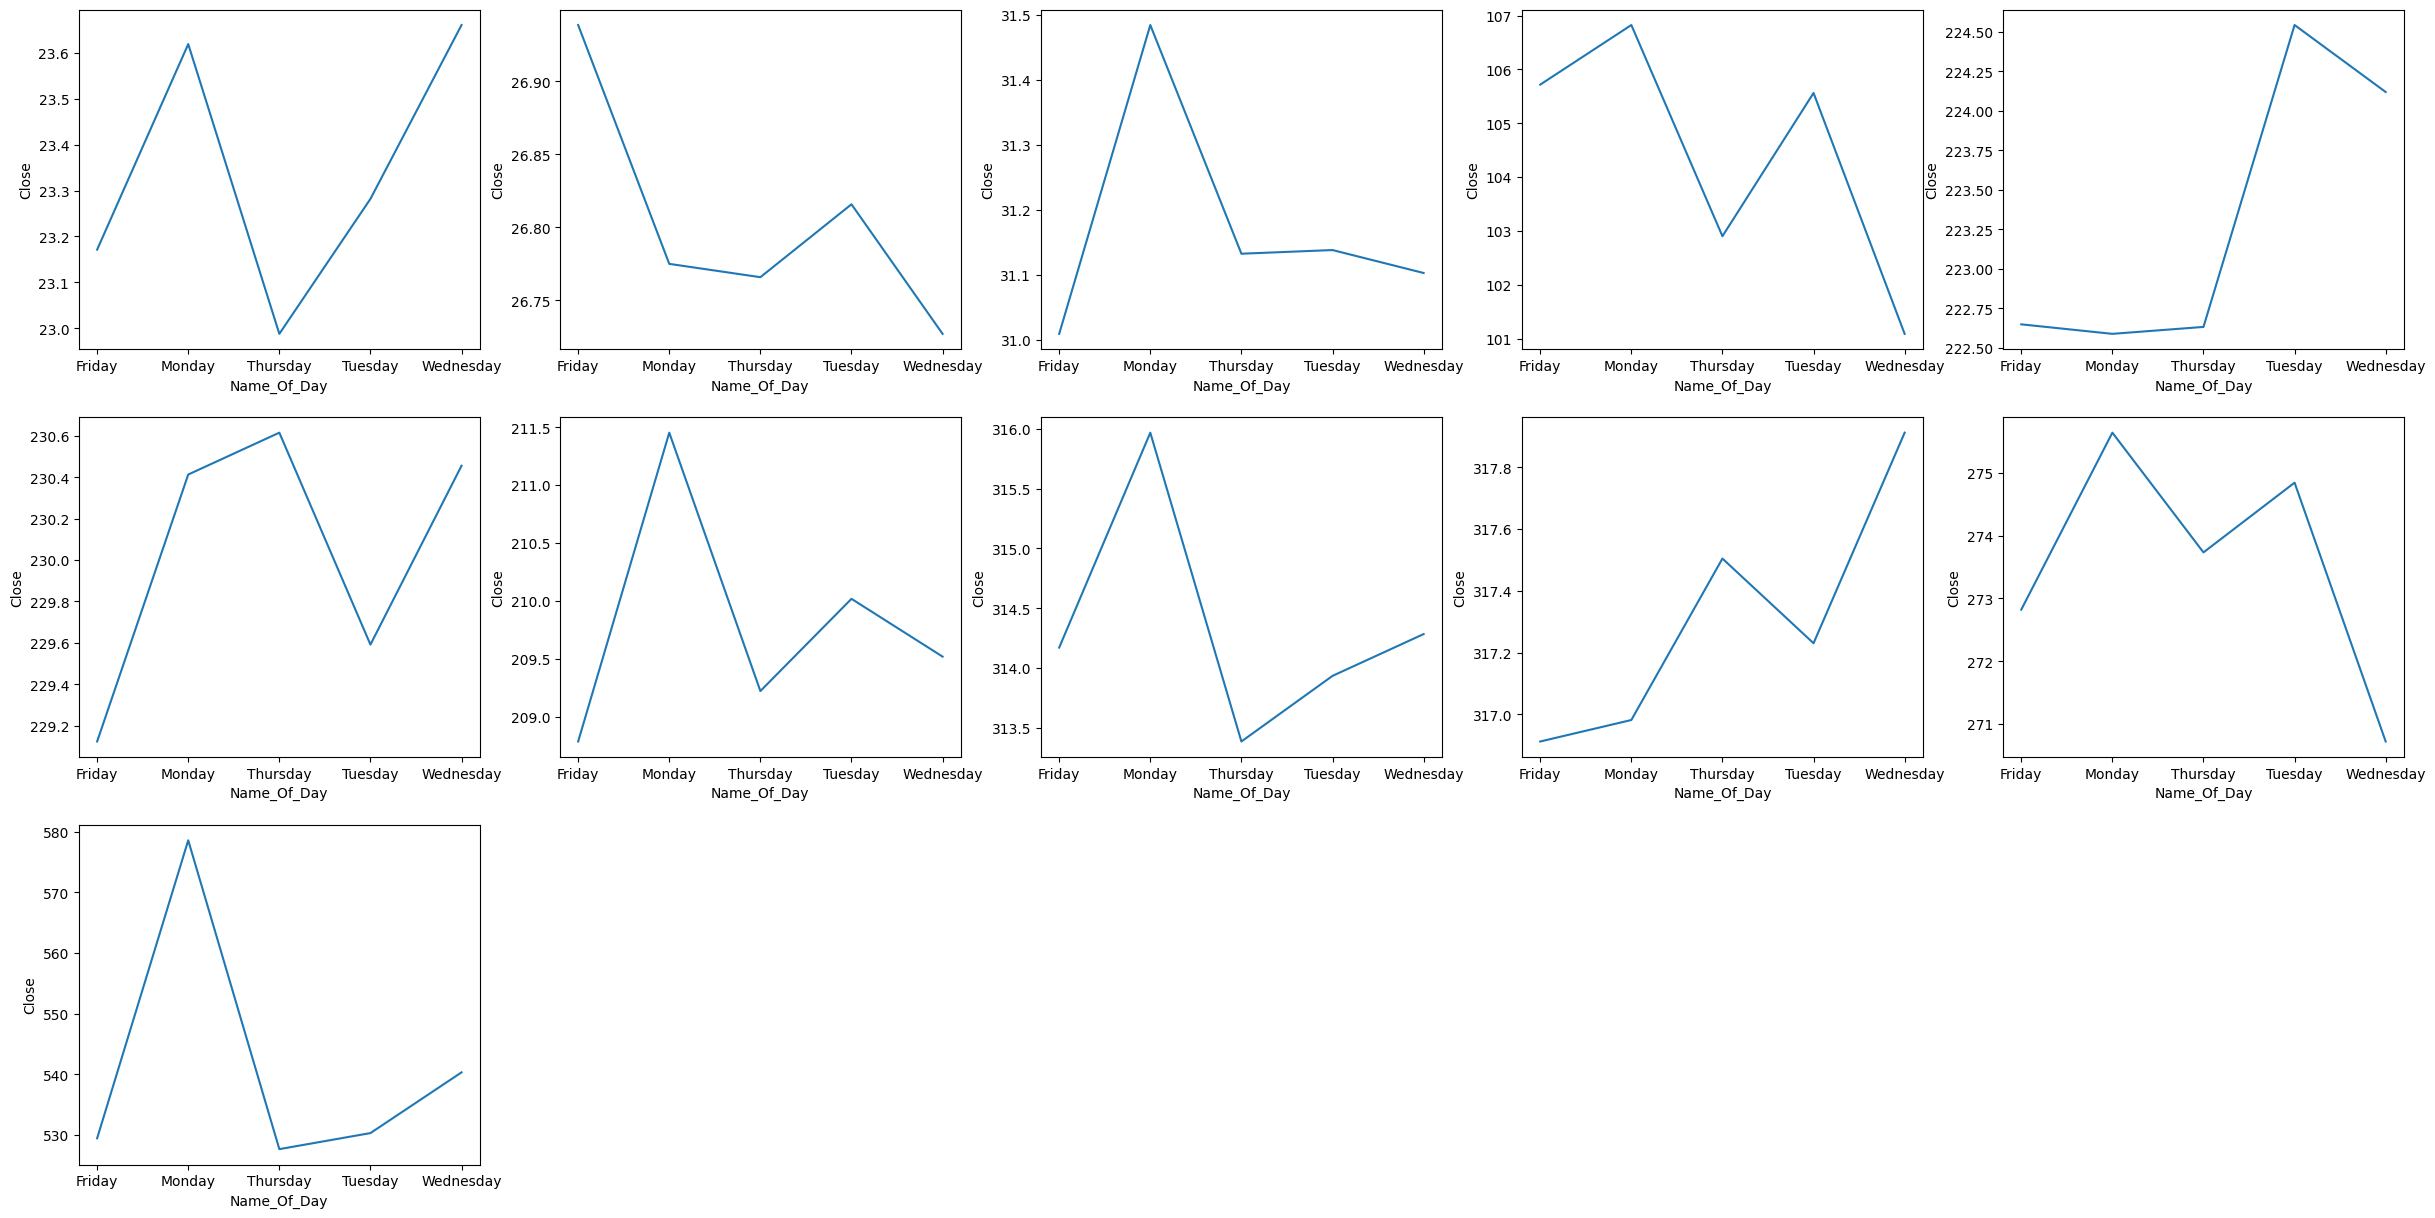

In [44]:
plt.subplots(figsize = (30,15))
for i, year in enumerate (Agg["Year"].unique()):
    plt.subplot(3,5, i+1)
    Data_year = Agg[Agg["Year"] == year]
    sns.lineplot(data = Data_year, x = "Name_Of_Day", y = "Close")
    

This shows the distribution of the average Close price per Day from 2010 - 2020

To group the data into quarter months 

A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

In [45]:
Data["Quarter_Month"] = np.where(Data["Month"] % 3 ==0, 1, 0)   #if the month divided by 3 gives no remainder then it 
#should be saved as 1 to indicate that it is a quarter month else it should be saved as 0 indicating that it is not a 
#quarter month

In [46]:
Data.head()

,Date,Open,High,Low,Close,Volume,Year,Day,Month,Name_Of_Day,Quarter_Month
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,2010,29,6,Tuesday,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,2010,30,6,Wednesday,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,2010,1,7,Thursday,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2010,2,7,Friday,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,2010,6,7,Tuesday,0


To make use of bar plots to visualize tesla stock prices (Open, High, Low, and Close) prices over the years

C:\Users\ENEJI\AppData\Local\Temp\ipykernel_27868\3284181023.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  use_year = Data.groupby("Year").mean()
C:\Users\ENEJI\AppData\Local\Temp\ipykernel_27868\3284181023.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


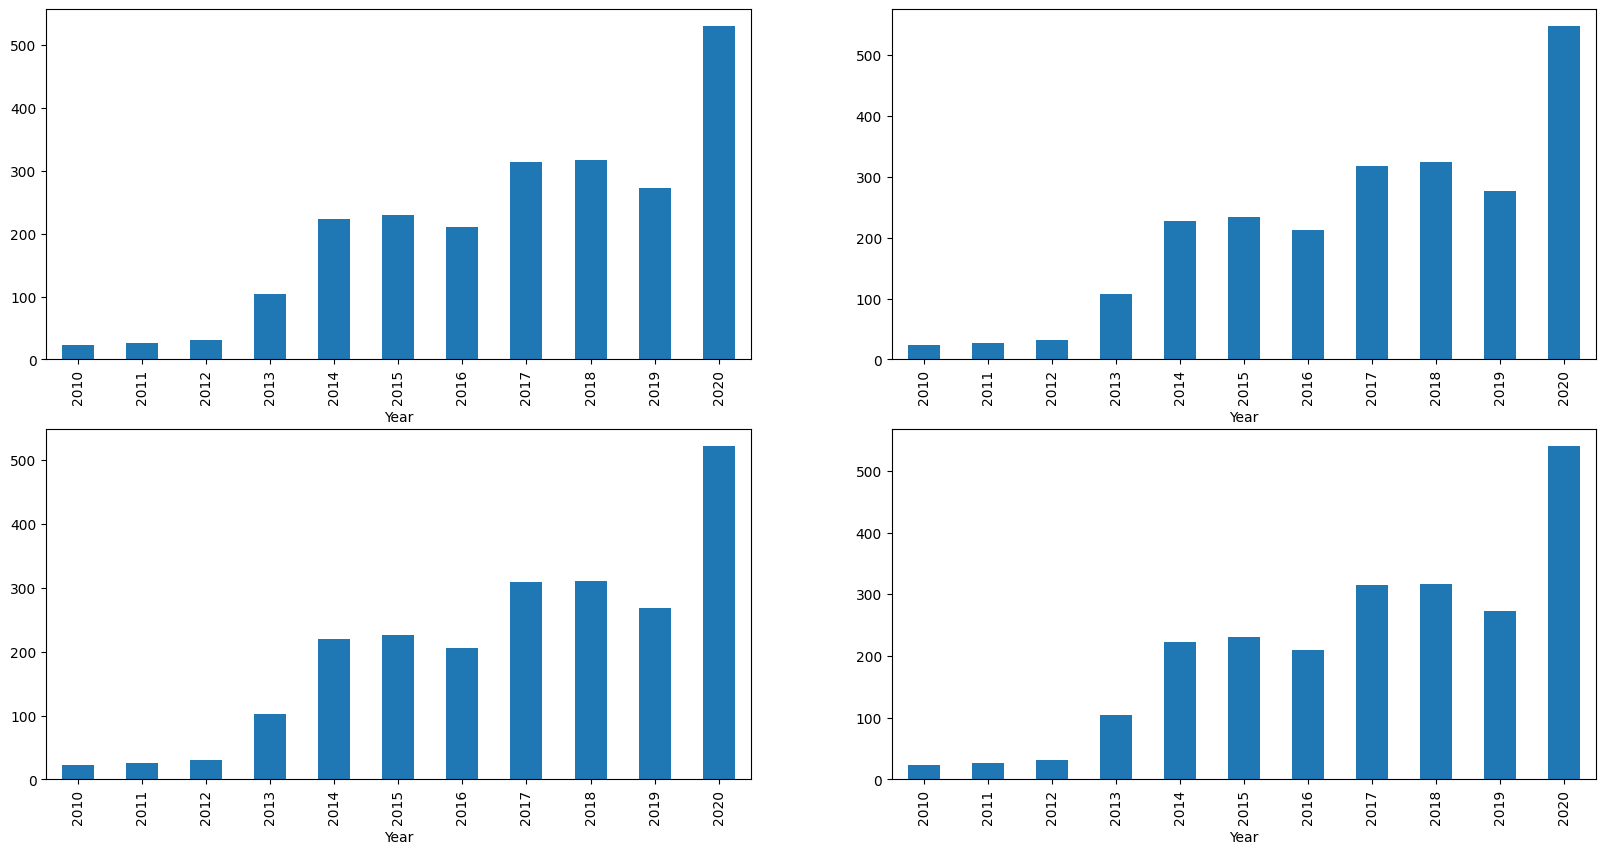

In [47]:
use_year = Data.groupby("Year").mean()
use = ["Open", "High", "Low", "Close"]
plt.subplots(figsize = (20,10))
for i, col in enumerate(use):
    plt.subplot(2, 2, i+1)
    use_year[col].plot.bar()

another way of doing that

C:\Users\ENEJI\AppData\Local\Temp\ipykernel_27868\3843421133.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  use_year = Data.groupby("Year").mean().reset_index()


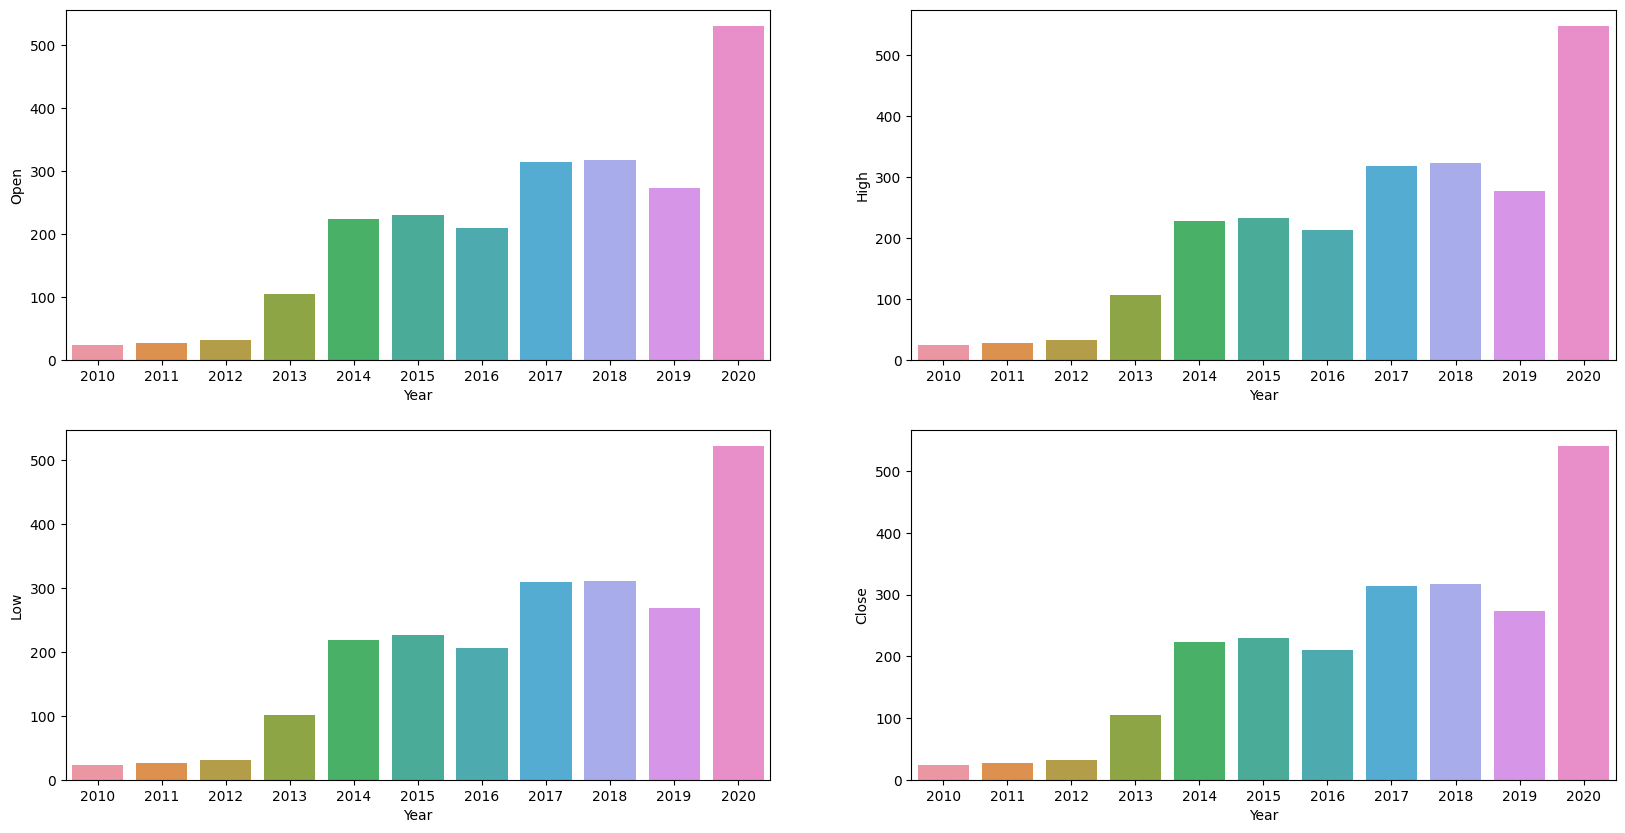

In [48]:
use_year = Data.groupby("Year").mean().reset_index()
use = ["Open", "High", "Low", "Close"]
plt.figure(figsize=(20, 10))

for i, col in enumerate(use):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=use_year["Year"], y=use_year[col])


C:\Users\ENEJI\AppData\Local\Temp\ipykernel_27868\154433356.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  use_year = Data.groupby("Year").mean().reset_index()


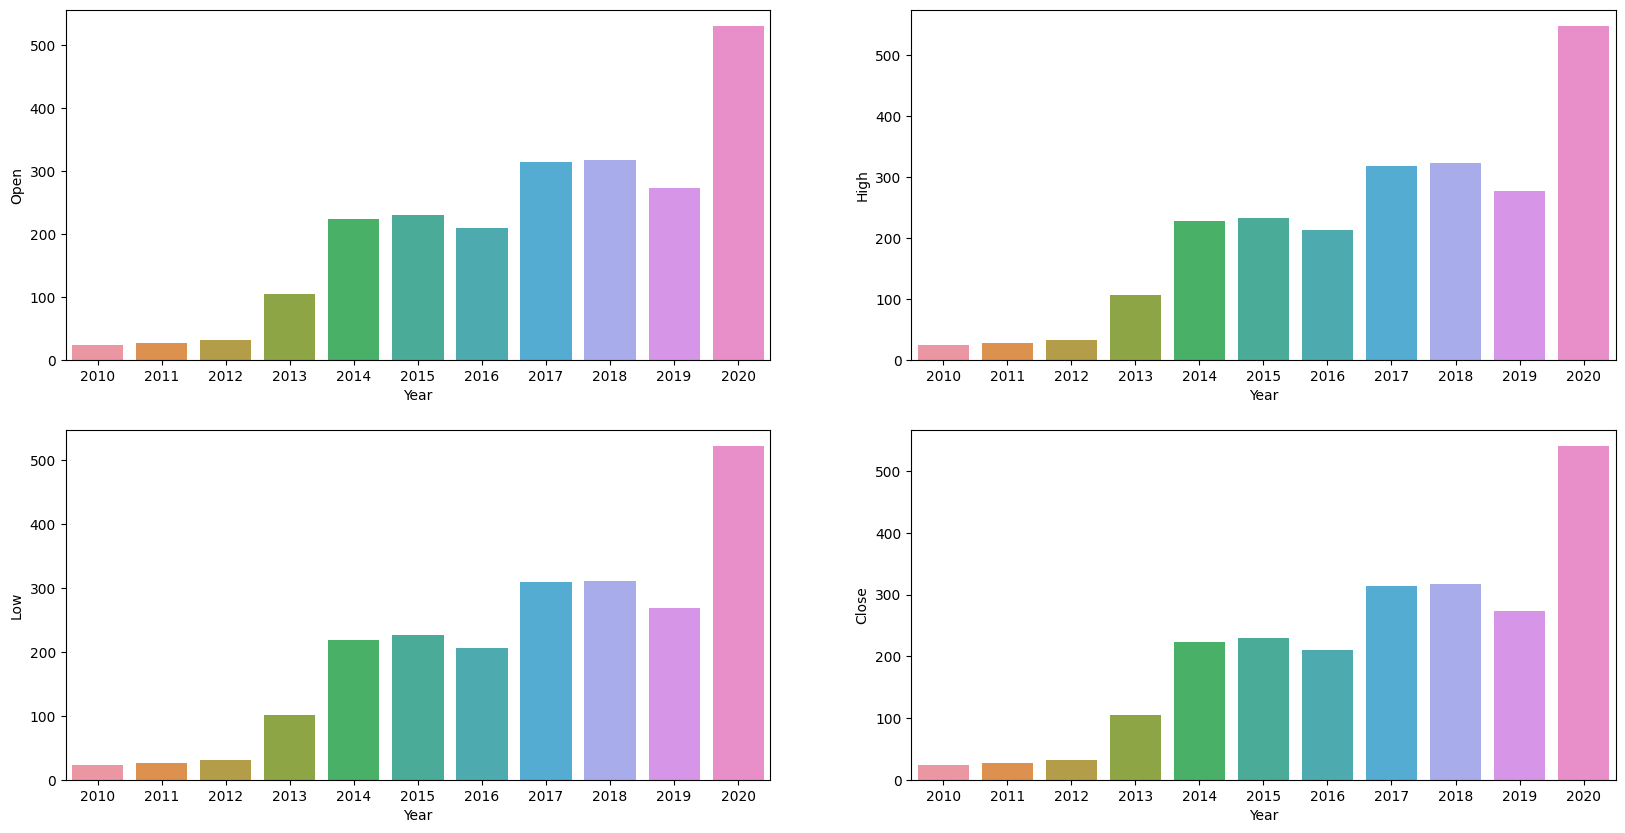

In [49]:
use_year = Data.groupby("Year").mean().reset_index()
use = ["Open", "High", "Low", "Close"]
plt.figure(figsize=(20, 10))

for i, col in enumerate(use):
    plt.subplot(2, 2, i+1)
    sns.barplot(data = use_year, x="Year", y=col)


From the above graph we can see that the stock prices doubled from 2013 to 2014 and also from 2012 to 2013

To check the average price of the stocks in months that are quarter months and months that are not

In [50]:
Data.groupby("Quarter_Month").mean()

C:\Users\ENEJI\AppData\Local\Temp\ipykernel_27868\2587845117.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Data.groupby("Quarter_Month").mean()


,Open,High,Low,Close,Volume,Year,Day,Month
Quarter_Month,,,,,,,,
0,185.875081,189.254226,182.449499,186.085081,5.767062e+06,2014.816213,15.710396,6.173886
1,187.071200,190.232700,183.860262,187.047163,5.180154e+06,2014.697500,15.825000,7.597500


Some observations to take note of 

NB -  Quarter Month = 1, Not Quarter Month = 0
The Open, Close, High, and Low prices of Tesla stocks were higher in quarter months

whereas,

The Volume of trades were lower in Quarter months 

Next we create 3 new Columns 

- (Open - Close) - This is to calculate the difference between the Open price and the Close price for each row in the DataFrame. Essentially it computes how much the stock price changed from the Opening to the Closing of a trading day

- (Low - High) - This is to calculate the difference between the Low and High price for each row in the trading day. This represents the range or volatility of the stock price during the trading day, with 'High' being the maximum price and 'Low' being the minimum price.

- (target) - This is to create a binary classification target variable. This variable is used to predict whether the price will go up or down in the next trading day.

In [51]:
Data["Open - Close"] = Data["Open"] - Data["Close"]
Data["Low - High"] = Data["Low"] - Data["High"]
Data["target"] = np.where(Data["Close"].shift(-1) > Data["Close"], 1, 0)

It is important to check if the target variables are balanced or not, to do this we can use a pie chart or value counts function

In [52]:
Data["target"].value_counts()

1    1235
0    1181
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1b863234790>,
 [Text(-0.038611867884826935, 1.0993221200623795, '1'),
  Text(0.038611970810791645, -1.0993221164472708, '0')],
 [Text(-0.021061018846269233, 0.5996302473067524, '51.1%'),
  Text(0.021061074987704532, -0.5996302453348749, '48.9%')])

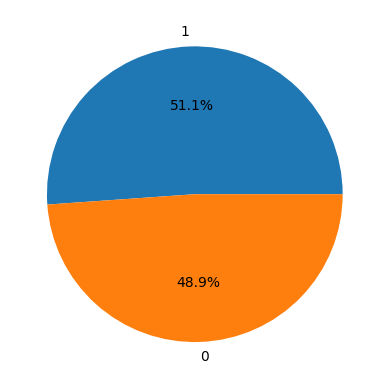

In [53]:
plt.pie(Data["target"].value_counts(),labels = [1,0],autopct = '%1.1f%%')

When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

C:\Users\ENEJI\AppData\Local\Temp\ipykernel_27868\549178449.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr() >0.9, annot = True, cbar = False)


<Axes: >

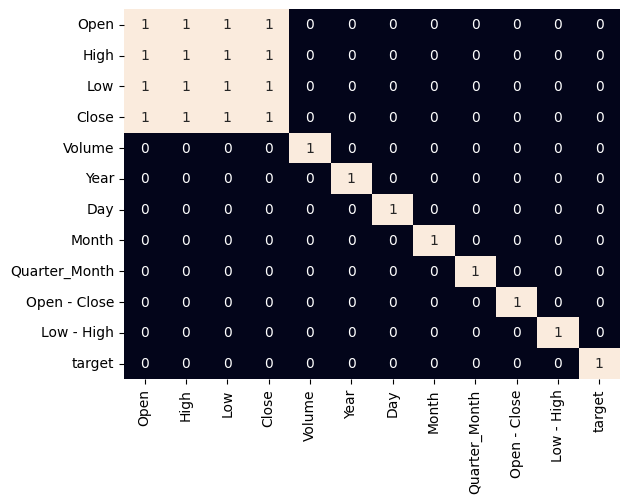

In [54]:
sns.heatmap(Data.corr() >0.9, annot = True, cbar = False)

From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

# DATA SPLITTING AND NORMALIZATION

In [55]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [56]:
Data.head()

,Date,Open,High,Low,Close,Volume,Year,Day,Month,Name_Of_Day,Quarter_Month,Open - Close,Low - High,target
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,2010,29,6,Tuesday,1,-4.889999,-7.459999,0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,2010,30,6,Wednesday,1,1.960001,-7.120001,0
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,2010,1,7,Thursday,0,3.040001,-5.650000,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2010,2,7,Friday,0,3.799999,-4.390001,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,2010,6,7,Tuesday,0,3.889999,-4.170000,0


In [57]:
X = Data[["Quarter_Month", "Open - Close", "Low - High"]]

In [58]:
y = Data["target"]

In [59]:
scale = StandardScaler()

In [60]:
X = scale.fit_transform(X)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 47)

To check the shape of the test and train data

In [62]:
X_train.shape

(2174, 3)

In [63]:
X_test.shape

(242, 3)

# Model Development and Evaluation

Now is the time to train some state-of-the-art machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

For the evaluation metric, we will use the ROC-AUC curve but why this is because instead of predicting the hard probability that is 0 or 1 we would like it to predict soft probabilities that are continuous values between 0 to 1. And with soft probabilities, the ROC-AUC curve is generally used to measure the accuracy of the predictions.



In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

using a for loop to train and test the 3 models on the seen data and the unseen data

In [65]:
models = [LogisticRegression(), SVC(kernel = 'poly', probability = True), XGBClassifier()]

for i in range (3):
    print(f"{models[i]}")
    models[i].fit(X_train, y_train)
    roc_score = roc_auc_score(y_train, models[i].predict_proba(X_train)[:,1])
    print(f" The ROC AUC score of the models ability to predict 1 on the known data is {roc_score}")
    print()
    roc_score2 = roc_auc_score(y_test, models[i].predict_proba(X_test)[:,1])
    print(f" The ROC AUC score of the models ability to predict 1 on the unseen data is {roc_score2}")
    print()

LogisticRegression()
 The ROC AUC score of the models ability to predict 1 on the known data is 0.5166380518926387

 The ROC AUC score of the models ability to predict 1 on the unseen data is 0.539960211291761

SVC(kernel='poly', probability=True)
 The ROC AUC score of the models ability to predict 1 on the known data is 0.4925008973864044

 The ROC AUC score of the models ability to predict 1 on the unseen data is 0.5029498525073747

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
         

USING THE THREE MODELS TO TRAIN AND THEN CHECKING THEIR ACCURACY SCORE IN PREDICTING ALL TARGET CLASSESS (1 and 0) ON THE UNSEEN DATA

In [66]:
ML = [LogisticRegression(), SVC(), XGBClassifier()]
ml = ["Logistic Regression", "SVC", "XGBClassifier"]
for model in range(3):
    ML[model].fit(X_train, y_train)
    predicted = ML[model].predict(X_test)
    score = accuracy_score(y_test, predicted)
    print(f"{ml[model]}'s accuracy score is {score}")
    print(" ")

Logistic Regression's accuracy score is 0.5495867768595041
 
SVC's accuracy score is 0.5206611570247934
 
XGBClassifier's accuracy score is 0.4793388429752066
 


from this we can see that on the unseen data (test data) Logistic Regression performed best with an accuracy score of 0.54 while the poorest model is the XGBClassifier with an accuracy score of 0.47

# To improve the accuracy score by tuning the hyperparameters using GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV

for Logistic Regression

In [68]:
#Defining the hyperparameters

param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.001,0.002, 0.003, 0.01, 0.1, 1, 10, 100, 100, 1000],
    'solver' : ['liblinear', 'saga']
}

#defining the model
model = LogisticRegression()

#defining the GridSeacrh
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 4)

#fitting the gridsearch
grid_search.fit(X_train, y_train)

#checking the best hyperparamter combination
print(f"the best hyperparameter combination fot the Logistic Regression model is {grid_search.best_params_}")
print("")
print(f"the accuracy score is {grid_search.best_score_}")

the best hyperparameter combination fot the Logistic Regression model is {'C': 0.002, 'penalty': 'l2', 'solver': 'saga'}

the accuracy score is 0.5161057171487379


Surprisingly after specifying values for "penalty", "C", "solver" hyperparameters for the Logistic Regression model the accuracy even reduced the model's accuracy

for SVC

In [69]:
model = SVC()

param_grid = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel' : ["linear", 'poly', 'rbf']
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['linear', 'poly', 'rbf']})

In [70]:
print(f"The best hyperparamter combination for SVC is {grid_search.best_params_}")
print("")
print(f"The accuracy score is {grid_search.best_score_}")

The best hyperparamter combination for SVC is {'C': 0.01, 'kernel': 'poly'}

The accuracy score is 0.5128809788654061


We can also observe that the accuracy score dropped when using those hyperparameters for the SVC model

for XGBoost Classifier

In [71]:
from xgboost import XGBClassifier

In [72]:
model = XGBClassifier()

param_grid = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'learning_rate' : [0.01, 0.02, 0.1, 1, 10, 100],
    'max_depth' : [3, 4, 5, 6, 7, 8],
    'subsample' : [0.8, 0.85, 0.9]
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)

grid_search.fit(X_train, y_train)

print(f"The best hyperparameter combination is {grid_search.best_params_}")

print(f"The accuracy score is {grid_search.best_score_}")

The best hyperparameter combination is {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
The accuracy score is 0.5216208485618943


for the XGBoostClassifier() the accuracy improved when we speicified some hyperparameters